# LIF model

In [ ]:
# Common neuron model parameters
DT = 0.1
V_REST = -70.0
V_RESET = -65.0
FIRING_THRESHOLD = -50
MEMBRANE_RESISTANCE = 10.0
MEMBRANE_TIME_SCALE = 8.0
ABSOLUTE_REFRACTORY_PERIOD = 2.0
INPUT_SPIKE_TIMES = [10, 20, 30, 32, 34, 36, 38, 55, 60, 62, 70, 84]
SYNAPSE_STRENGTH = 75.0

In [ ]:
from _spark import simulate_LIF_model_spark
from _brian2 import simulate_LIF_model_brian
import brian2 as b2

b2_times, b2_potentials, b2_spikes = simulate_LIF_model_brian(
	spike_times = INPUT_SPIKE_TIMES,
	synapse_strength = SYNAPSE_STRENGTH,
	t_max = 100.0,
	dt = DT,
	v_rest = V_REST * b2.mV,
	v_reset = V_RESET * b2.mV,
	firing_threshold = FIRING_THRESHOLD * b2.mV,
	membrane_resistance = MEMBRANE_RESISTANCE * b2.Mohm,
	membrane_time_scale = MEMBRANE_TIME_SCALE * b2.ms,
	abs_refractory_period = ABSOLUTE_REFRACTORY_PERIOD * b2.ms
)

spark_times, spark_potentials, spark_spikes = simulate_LIF_model_spark(
    spike_times = INPUT_SPIKE_TIMES,
	dt = DT,
	synapse_strength = SYNAPSE_STRENGTH,
	potential_rest = V_REST,
	potential_reset = V_RESET,
	potential_tau = MEMBRANE_TIME_SCALE,
	resistance = MEMBRANE_RESISTANCE,
	threshold = FIRING_THRESHOLD,
	cooldown = ABSOLUTE_REFRACTORY_PERIOD - DT,
    offset = V_REST,
)

In [ ]:
from _plotting import single_neuron_plots

single_neuron_plots(
    INPUT_SPIKE_TIMES,
    FIRING_THRESHOLD,
    spark_times,
    spark_potentials,
    spark_spikes,
    b2_times,
    b2_potentials,
    b2_spikes,
    'Leaky Integrate-and-Fire Model Comparison',
)

# AdEx model

In [ ]:
# Common neuron model parameters
DT = 0.1
MEMBRANE_TIME_SCALE_TAU_M = 5.0
MEMBRANE_RESISTANCE_R = 500.0
V_REST = -70.0
V_RESET = -51.0
RHEOBASE_THRESHOLD_V_RH = -50.0
SHARPNESS_DELTA_T = 2.0
ADAPTATION_VOLTAGE_COUPLING_A = 0.5
ADAPTATION_TIME_CONSTANT_TAU_W = 100.0
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_B = 7.0
FIRING_THRESHOLD_V_SPIKE = -30.0
INPUT_SPIKE_TIMES = [10, 20, 30, 32, 34, 36, 38, 55, 60, 62, 70, 84]
SYNAPSE_STRENGTH = 75.0

In [ ]:
from _spark import simulate_AdEx_model_spark
from _brian2 import simulate_AdEx_model_brian
import brian2 as b2

b2_times, b2_potentials, b2_spikes = simulate_AdEx_model_brian(
	spike_times = INPUT_SPIKE_TIMES,
	synapse_strength = SYNAPSE_STRENGTH,
	t_max = 100.0,
	dt = DT,
	tau_m = MEMBRANE_TIME_SCALE_TAU_M * b2.ms,
	R = MEMBRANE_RESISTANCE_R * b2.Mohm,
	v_rest = V_REST * b2.mV,
	v_reset = V_RESET * b2.mV,
	v_rheobase = RHEOBASE_THRESHOLD_V_RH * b2.mV,
	a = ADAPTATION_VOLTAGE_COUPLING_A * b2.nS,
	b = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_B * b2.pA,
	firing_threshold = FIRING_THRESHOLD_V_SPIKE * b2.mV,
	delta_T = SHARPNESS_DELTA_T * b2.mV,
	tau_w = ADAPTATION_TIME_CONSTANT_TAU_W * b2.ms,
)

spark_times, spark_potentials, spark_spikes = simulate_AdEx_model_spark(
    spike_times = INPUT_SPIKE_TIMES,
	dt = DT,
	synapse_strength = SYNAPSE_STRENGTH,
	potential_rest = V_REST,
	potential_reset = V_RESET,
	potential_tau = MEMBRANE_TIME_SCALE_TAU_M,
	resistance = MEMBRANE_RESISTANCE_R,
	threshold = FIRING_THRESHOLD_V_SPIKE,
	rheobase_threshold = RHEOBASE_THRESHOLD_V_RH,
	spike_slope = SHARPNESS_DELTA_T,
	adaptation_tau = ADAPTATION_TIME_CONSTANT_TAU_W,
	adaptation_delta = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_B / 1000, # pA -> nA
	adaptation_subthreshold = ADAPTATION_VOLTAGE_COUPLING_A / 1000,	# nS -> µS
    offset = V_REST,
)

In [ ]:
from _plotting import single_neuron_plots

single_neuron_plots(
    INPUT_SPIKE_TIMES,
    RHEOBASE_THRESHOLD_V_RH,
    spark_times,
    spark_potentials,
    spark_spikes,
    b2_times,
    b2_potentials,
    b2_spikes,
    'Adaptive Exponential Model Comparison',
)

In [ ]:
import warnings
warnings.filterwarnings('ignore', message='_get_vc_env is private')

import os
os.environ['CC'] = 'gcc'
os.environ['CXX'] = 'g++'

import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
import time
import tqdm

def spikes_to_current(spike_times, k=1.0, t_max=100.0, dt=0.1):
	"""
		Convert spike times into a discrete current trace.
	"""
	times = np.arange(0, t_max + dt, dt)
	currents = np.zeros_like(times)
	for s in spike_times:
		idx = int(round(s / dt))
		if 0 <= idx < len(currents):
			currents[idx] += k
	return times, currents




DT = 0.01
INPUT_SPIKE_TIMES = [10, 20, 30, 32, 34, 36, 38, 55, 60, 62, 70, 84]
SYNAPSE_STRENGTH = 100.0

# Parameters
CM = 1
E_LEAK = 10.6
E_NA = 115
E_K = -12
G_LEAK = 0.3
G_NA = 120
G_K = 36
THRESHOLD = 30

times, potentials, spikes, vars = simulate_HH_model_brian(
	spike_times = INPUT_SPIKE_TIMES,
	synapse_strength = SYNAPSE_STRENGTH,
	t_max = 100.0,
	dt = DT,
	c_m = CM * b2.ufarad, #/(b2.cm**2)
	e_leak = E_LEAK * b2.mV,
	e_k = E_K * b2.mV,
	e_na = E_NA * b2.mV,
	g_leak = G_LEAK * b2.msiemens,
	g_na = G_NA  * b2.msiemens,
	g_k = G_K  * b2.msiemens,
	threshold = THRESHOLD * b2.mV,
)

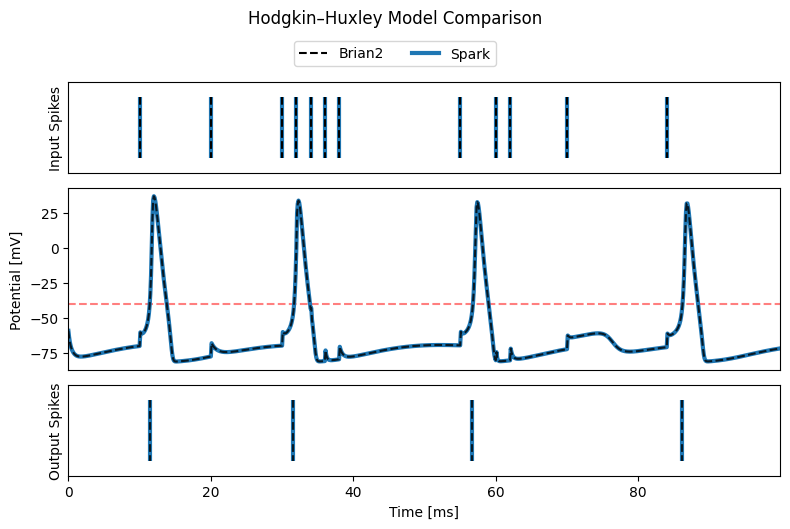

In [2]:
from _plotting import single_neuron_plots

single_neuron_plots(
    INPUT_SPIKE_TIMES,
    -40,
    times,
    potentials,
    spikes,
    times,
    potentials,
    spikes,
    'Hodgkin–Huxley Model Comparison',
)


In [ ]:
import sys
sys.path.append('..')

import jax
import jax.numpy as jnp
import flax.nnx as nnx
import numpy as np
import spark
import time
from functools import partial
from hh import HodgkinHuxleyNeuron, HodgkinHuxleySomaConfig




In [ ]:
DT = 0.1
INPUT_SPIKE_TIMES = [10, 20, 30, 32, 34, 36, 38, 55, 60, 62, 70, 84]
SYNAPSE_STRENGTH = 100.0
CM = 1
E_LEAK = 10.6
E_NA = 115
E_K = -12
G_LEAK = 0.3
G_NA = 120
G_K = 36
THRESHOLD = 30

In [2]:
from _spark import simulate_HH_model_spark
from _brian2 import simulate_HH_model_brian
import brian2 as b2

b2_times, b2_potentials, b2_spikes = simulate_HH_model_brian(
	spike_times = INPUT_SPIKE_TIMES,
	synapse_strength = SYNAPSE_STRENGTH,
	t_max = 100.0,
	dt = DT,
	c_m = CM * b2.ufarad, #/(b2.cm**2)
	e_leak = E_LEAK * b2.mV,
	e_k = E_K * b2.mV,
	e_na = E_NA * b2.mV,
	g_leak = G_LEAK * b2.msiemens,
	g_na = G_NA  * b2.msiemens,
	g_k = G_K  * b2.msiemens,
	threshold = THRESHOLD * b2.mV,
)

spark_times, spark_potentials, spark_spikes = simulate_HH_model_spark(
    spike_times = INPUT_SPIKE_TIMES,
    dt = DT,
	synapse_strength = SYNAPSE_STRENGTH * 10,
	c_m = CM,
	e_leak = E_LEAK,
	e_k = E_K,
	e_na = E_NA,
	g_leak = G_LEAK,
	g_na = G_NA,
	g_k = G_K,
    threshold = THRESHOLD,
    offset = -70,
)

WARNING    /home/nogar/Project/Spark/benchmarks/hh.py:311: UserWarning: Explicitly requested dtype float64 requested in ones is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  inhibition_mask = jnp.ones((self._units,), dtype=self._dtype)
 [py.warnings]
  inhibition_mask = jnp.ones((self._units,), dtype=self._dtype)

WARNING    /home/nogar/Project/Spark/benchmarks/../spark/nn/initializers/common.py:49: UserWarning: Explicitly requested dtype float64 requested in ones is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  array: jax.Array = self.config.scale * jnp.ones(shape, dtype=self.config.dtype)
 [py.warnings]
  array: ja

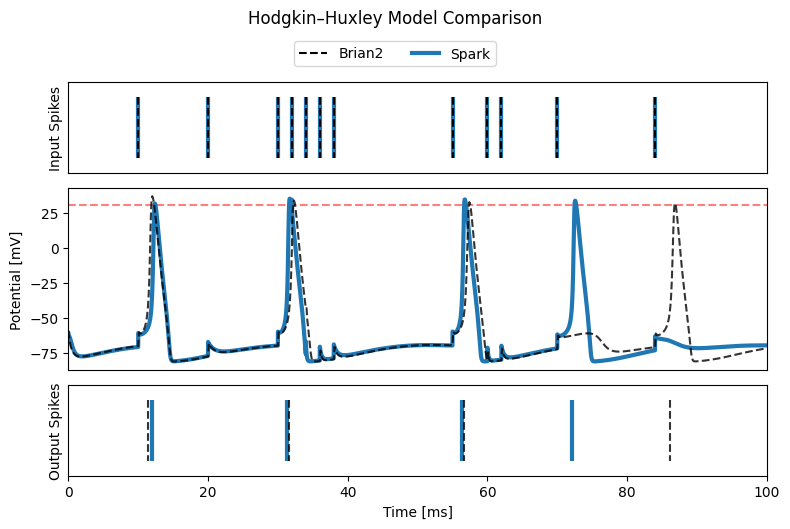

In [4]:
from _plotting import single_neuron_plots

single_neuron_plots(
    INPUT_SPIKE_TIMES,
    THRESHOLD,
    spark_times,
    spark_potentials,
    spark_spikes,
    b2_times,
    b2_potentials,
    b2_spikes,
    'Hodgkin–Huxley Model Comparison',
)


In [ ]:
from brian2 import *

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1000, type='axon')

El = 10.613*mV
ENa = 115*mV
EK = -12*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10*mV/exprel((-v+25*mV)/(10*mV))/ms : Hz
betam = 4 * exp(-v/(18*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20*mV))/ms : Hz
betah = 1/(exp((-v+30*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10*mV/exprel((-v+10*mV)/(10*mV))/ms : Hz
betan = 0.125*exp(-v/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=1*uF/cm**2,
                       Ri=35.4*ohm*cm, method="exponential_euler")
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0
neuron.gNa = gNa0
neuron[5*cm:10*cm].gNa = 0*siemens/cm**2
M = StateMonitor(neuron, 'v', record=True)
state_monitor = StateMonitor(neuron, ['v', 'm', 'h', 'n'], record=True)

run(50*ms, report='text')
neuron.I[0] = 1*uA  # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(100*ms, report='text')
for i in range(75, 125, 1):
    plot(cumsum(neuron.length)/cm, i+(1./60)*M.v[:, i*5]/mV, 'k')
yticks([])
ylabel('Time [major] v (mV) [minor]')
xlabel('Position (cm)')
axis('tight')
show()

vars = {
	'm': state_monitor.m[3],
	'h': state_monitor.h[3],
	'n': state_monitor.n[3]
}
plt.plot(vars['m'])
plt.plot(vars['h'])
plt.plot(vars['n'])
plt.xlim(0,2500)
plt.show()
